<a href="https://colab.research.google.com/github/Yuumna/ECEN501-project-Breast-Cancer-Detection-/blob/master/Final_Exam_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


## **Data Exploration**

In [25]:
housing_df = pd.read_csv('housing.csv')
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
print('Shape :',housing_df.shape)
print('Features Data types : \n',housing_df.dtypes) #check the data type of features 
print('checking if any null values') #check null values 
print(housing_df.isnull().sum())     

Shape : (20640, 10)
Features Data types : 
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
checking if any null values
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [27]:
display(housing_df.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## **Data visulaization**

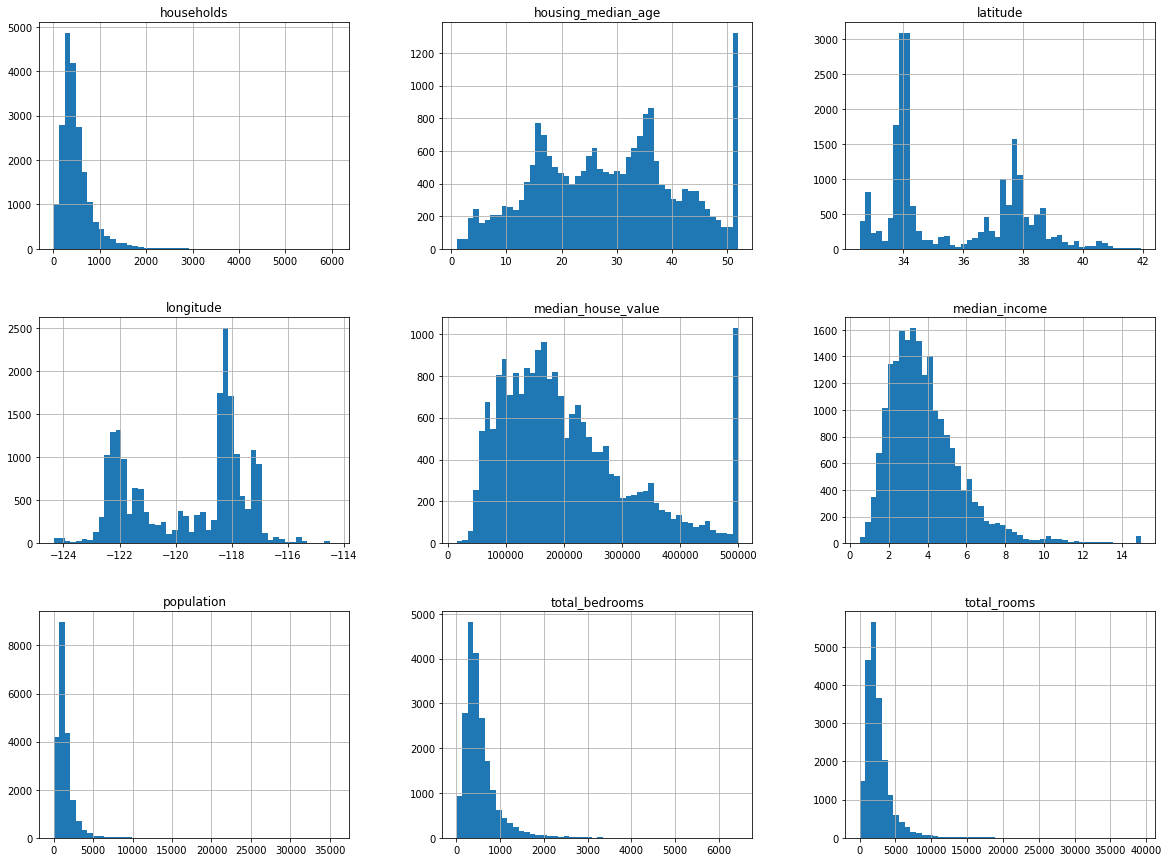

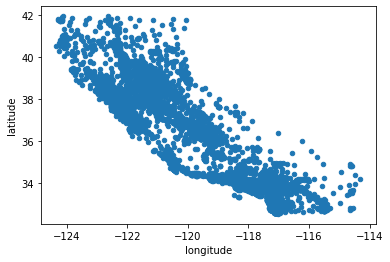

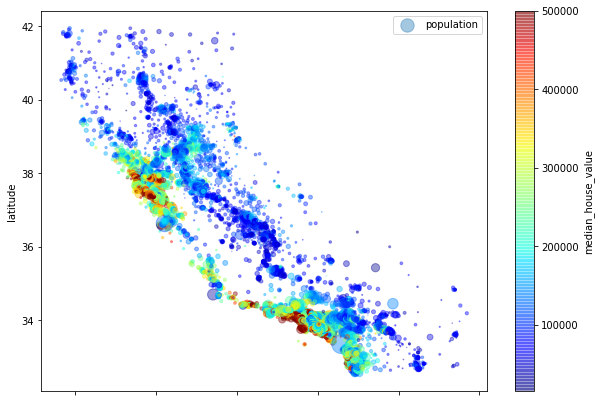

In [28]:
housing_df.hist(bins=50, figsize=(20, 15))
plt.show()
housing_df.plot(kind="scatter", x="longitude", y="latitude")
housing_df.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing_df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## **Correlation between features**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1199c982e8>,
      dtype=object)

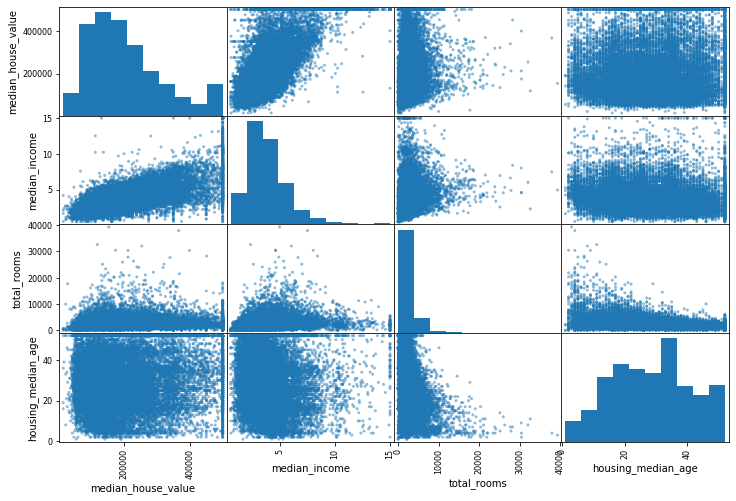

In [29]:
corrMatrix = housing_df.corr()
corrMatrix["median_house_value"].sort_values(ascending=False)
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing_df[attributes], figsize=(12, 8))

In [30]:
housing_df.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

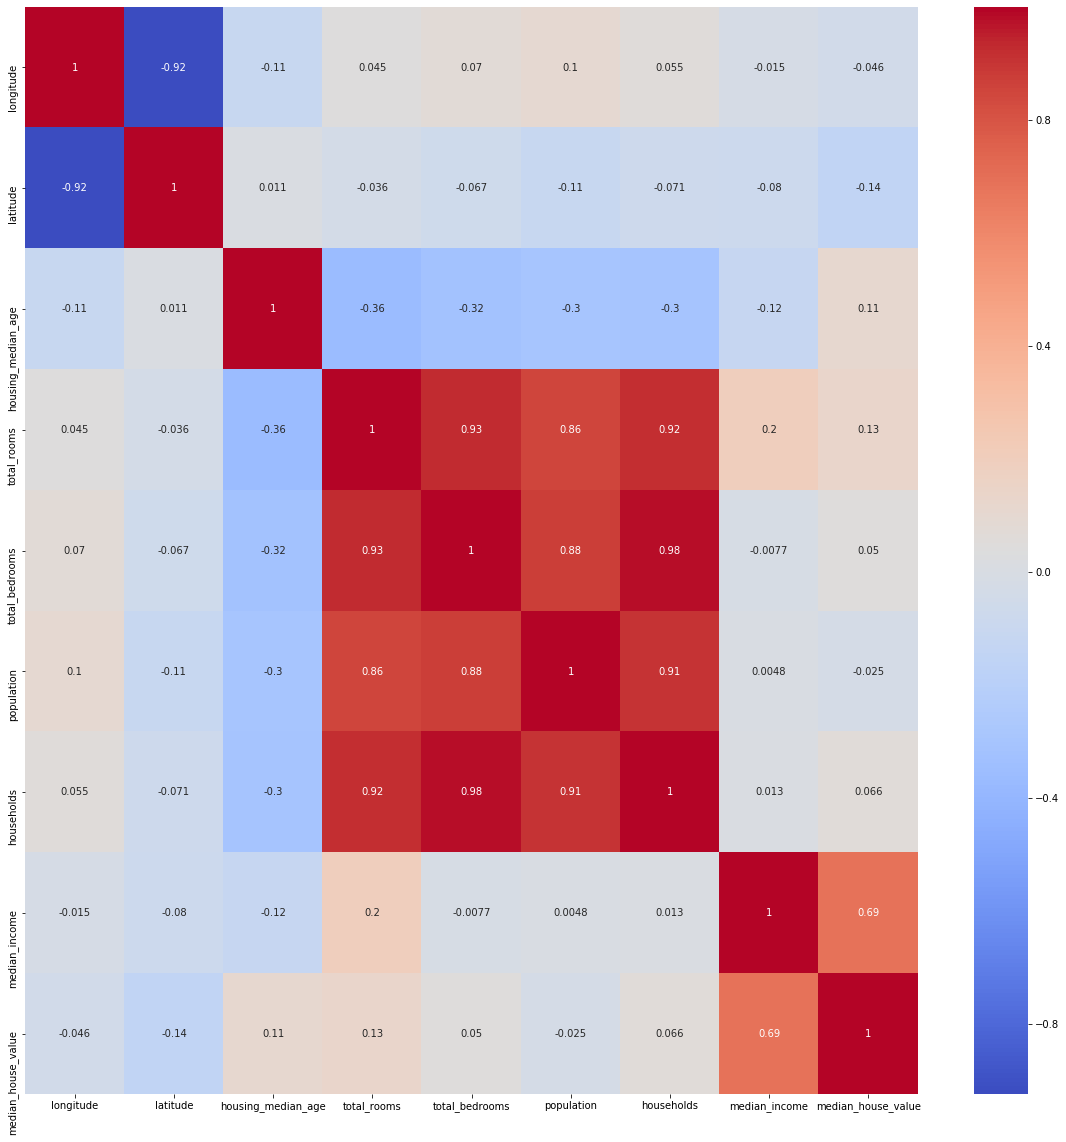

In [31]:
# Finding correlation among features using sns' heatmap
plt.figure(figsize=(20,20))
sns.heatmap(housing_df.corr(),annot=True,cmap='coolwarm')

*Prepare* the data (Preprocessing):
• Data cleaning.
• Feature selection.
• Feature engineering (discretize, decompose, ... etc.)
• Feature scaling.
**bold text**

In [32]:
#Fillling all NAN values of Dataframe with Mean value
housing_df['total_bedrooms'][housing_df['total_bedrooms'].isnull()] = np.mean(housing_df['total_bedrooms'])
print('checking if any null values') #check null values 
print(housing_df.isnull().sum())     

checking if any null values
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
# Convert these categories from text to numbers

le = LabelEncoder() 
housing_df["ocean_proximity"] = le.fit_transform(housing_df["ocean_proximity"])
housingCatEncoded= housing_df["ocean_proximity"]
print(housingCatEncoded)

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20640, dtype: int64


## **Scaling**

In [34]:

convert = preprocessing.StandardScaler() 
housing_df.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [0]:
feature = housing_df.drop(['median_house_value'], axis=1)
label = housing_df.median_house_value

In [36]:
featureT = convert.fit_transform(feature.values)
labelT = convert.fit_transform(housing_df.median_house_value.values.reshape(-1,1)).flatten()
labelT

array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
       -1.05860847, -1.01787803])

## **Splitting dataset**

In [0]:

feature_train, feature_test,label_train, label_test = train_test_split(featureT,labelT, test_size=0.2, random_state=19)      

## **Linear Regression model**

In [38]:

linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)
r2_score(linear_reg.predict(feature_train),label_train)

0.43306908722617576

## **Cross Validation**

In [39]:
cross_val_score(linear_reg, feature_train,label_train, cv=10).mean() #Training accuracy 

0.6367596073508442

In [40]:
reg_score = r2_score(linear_reg.predict(feature_test),label_test) 
reg_score

0.42488928231808554

In [41]:
cross_val_score(linear_reg, feature_test,label_test, cv=10).mean() #Testing Accuracy 

0.6098268726971962

## **Decision tree Model**

In [42]:

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(feature_train,label_train)
print('mean squared errror is',end='\t-') 
np.sqrt(mean_squared_error(label_test,regressor.predict(feature_test)))


mean squared errror is	-

0.6190843261366482

In [43]:
cross_val_score(regressor, feature_train, label_train, cv=10).mean()

0.6335121083450586

## **Parameter Tuning**

In [44]:

params=[{
            
            'max_depth':[2,3,4,5,6,10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
         
            'max_features':['sqrt','log2'],
            
        }
        ]


gc=GridSearchCV(regressor,params,cv=10,scoring='r2',n_jobs=-1)
gc.fit(feature_train,label_train)
gc.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=30, max_features='sqrt',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [45]:
gc.best_score_

0.6903549623352215